© Copyright 2022, Mohamed Ibrahim Mohamed <br>
All rights reserved.

# Week 4
## <span id = "table"><h1> Data Visualization</h1></span>

<span id = "rap"><h3>Using seaborn </h3></span>

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt # plots
import seaborn as sns ## generates enhanced plots

In [3]:
df_ngp=pd.read_csv('Lecture4_Natural_Gas_Pricing_Version2_DataSet.csv')

In [3]:
df_ngp.columns

Index(['Month', 'Value', 'Prior to 2000'], dtype='object')

In [4]:
df_ngp.head()

,Month,Value,Prior to 2000
0,January,5.25,0.0
1,February,2.86,0.0
2,March,2.95,0.0
3,April,3.45,0.0
4,May,3.57,0.0


In [5]:
df_ngp

,Month,Value,Prior to 2000
0,January,5.25,0.0
1,February,2.86,0.0
2,March,2.95,0.0
3,April,3.45,0.0
4,May,3.57,0.0
...,...,...,...
283,NaN,NaN,NaN
284,NaN,NaN,NaN
285,NaN,NaN,NaN
286,NaN,NaN,NaN


In [6]:
df_ngp1 = df_ngp.dropna()
df_ngp1

,Month,Value,Prior to 2000
0,January,5.25,0.0
1,February,2.86,0.0
2,March,2.95,0.0
3,April,3.45,0.0
4,May,3.57,0.0
...,...,...,...
266,March,2.75,1.0
267,April,2.60,1.0
268,May,2.59,1.0
269,June,2.42,1.0


In [7]:
df_ngp1.describe()

,Value,Prior to 2000
count,271.000000,271.000000
mean,5.406642,0.867159
std,2.958405,0.340031
min,1.750000,0.000000
25%,3.295000,1.000000
50%,4.420000,1.000000
75%,7.015000,1.000000
max,19.110000,1.000000


In [8]:
df_ngp1['Prior to 2000'].unique()

array([0., 1.])

In [9]:
df_ngp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 270
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          271 non-null    object 
 1   Value          271 non-null    float64
 2   Prior to 2000  271 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.5+ KB


<AxesSubplot:xlabel='Prior to 2000', ylabel='Month'>

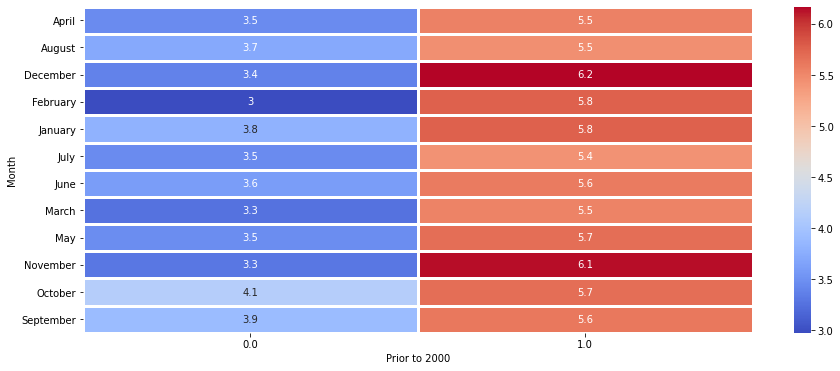

In [10]:
df_ngp_pivot=df_ngp1.pivot_table(values='Value',index='Month',columns='Prior to 2000')
fig=plt.figure(figsize=(15,6))
sns.heatmap(df_ngp_pivot, cmap='coolwarm',annot=True, linecolor='white', linewidths=3)

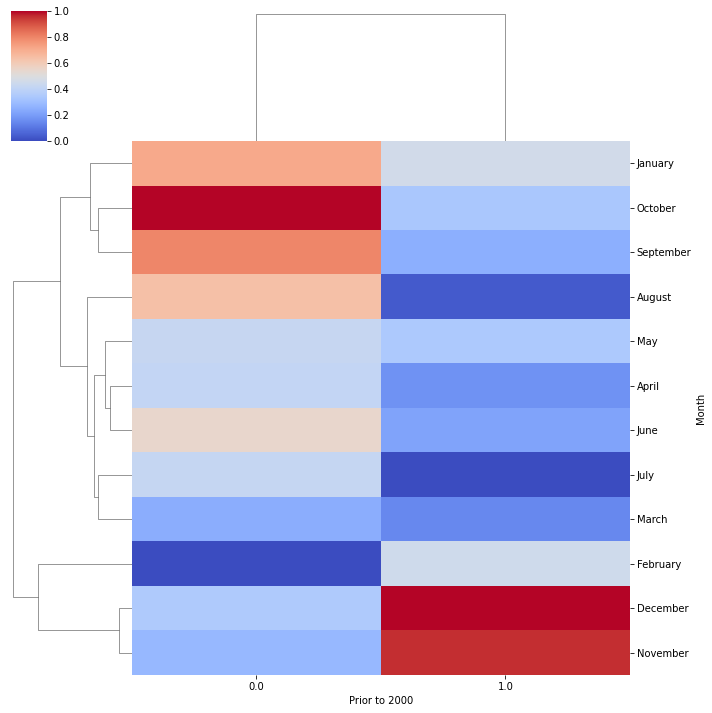

In [11]:
sns.clustermap(df_ngp_pivot,cmap='coolwarm',standard_scale=1)

Text(0.5, 1.0, 'Gas Pricing Vs. Date')

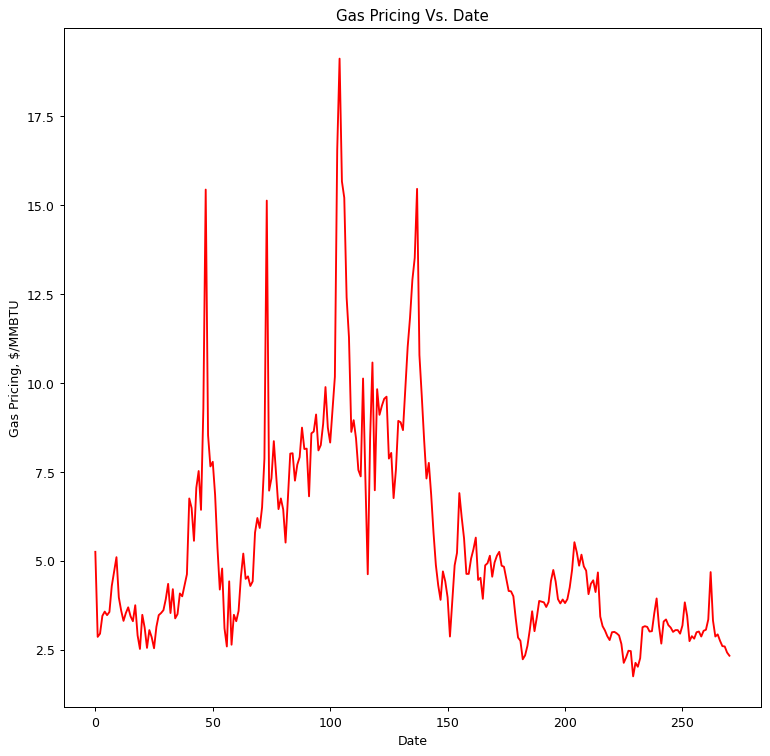

In [12]:
# Use plt.figure(figsize=(10,10)) to change the size of the figure

fig=plt.figure(figsize=(10,10), dpi=90)
plt.plot(df_ngp1.index.values,df_ngp1['Value'], color='red')
plt.xlabel('Date')
plt.ylabel('Gas Pricing, $/MMBTU')
plt.title('Gas Pricing Vs. Date')

In [13]:
df=pd.read_csv('Lecture4_Production_DataSet.csv')

In [14]:
df.columns

Index(['Hours', 'Summary_Date', 'Time', 'Tubing_Pressure', 'Casing_Pressure',
       'Oil_Data_Hourly', 'Water_Data_Hourly', 'Gas_Data_Hourly',
       'Unnamed: 8'],
      dtype='object')

In [15]:
df['Prod_Date']=pd.to_datetime(df['Summary_Date'] + ' ' + df['Time'])
df[['Prod_Date']].head(20)

,Prod_Date
0,1992-11-11 06:00:00
1,1992-11-11 07:00:00
2,1992-11-11 08:00:00
3,1992-11-11 09:00:00
4,1992-11-11 10:00:00
5,1992-11-11 11:00:00
6,1992-11-11 12:00:00
7,1992-11-11 13:00:00
8,1992-11-11 14:00:00
9,1992-11-11 15:00:00


Text(0, 0.5, 'Gas Production Rate (MSCF/D), Casing Pressure (psi), Tubing Pressure (psi)')

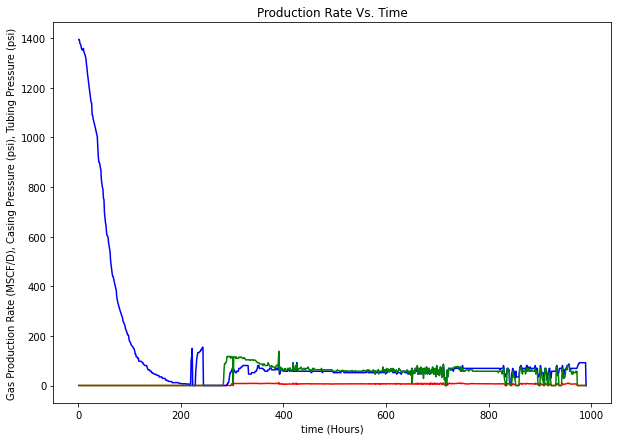

In [16]:

fig=plt.figure(figsize=(10,7))
plt.plot(df['Hours'],df['Gas_Data_Hourly'], color='red')
plt.plot(df['Hours'],df['Casing_Pressure'], color='blue')
plt.plot(df['Hours'],df['Tubing_Pressure'], color='green')
plt.title('Production Rate Vs. Time')
plt.xlabel('time (Hours)')
plt.ylabel('Gas Production Rate (MSCF/D), Casing Pressure (psi), Tubing Pressure (psi)')

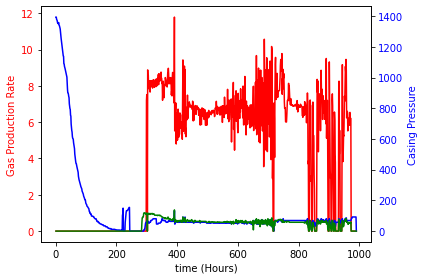

In [17]:
fig, ax1=plt.subplots()
ax1.plot(df['Hours'],df['Gas_Data_Hourly'], color='red')
ax1.set_xlabel('time (Hours)')
ax1.set_ylabel('Gas Production Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax2=ax1.twinx() # instantiate a second axes that shares the same x-axis
ax2.plot(df['Hours'],df['Casing_Pressure'], color='blue')
ax2.set_ylabel('Casing Pressure', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.plot(df['Hours'],df['Tubing_Pressure'], color='green')
fig.tight_layout()


<span id = "rap"><h3>Using Plotly and Cufflinks </h3></span>

In [18]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [19]:
df_Shale=pd.read_csv('Lecture4_Shale_Gas_Wells_DataSet.csv')

In [20]:
df_Shale.columns

Index(['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Dip', 'Thickness',
       'Lateral Length', 'Injection Rate', 'Porosity', 'ISIP',
       'Water Saturation', 'Percentage of LG', 'Pressure Gradient',
       'Proppant Loading', 'EUR', 'Formation'],
      dtype='object')

In [21]:
df_Shale.describe()

,Stage Spacing,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,147.639053,820.019724,0.069034,162.339250,8151.696252,63.088757,7.336095,7006.524655,19.223077,64.874753,0.930237,2566.895464,308.676647
std,18.373967,135.638585,0.253762,15.467143,941.982926,7.246235,0.749426,1213.543795,3.202778,18.421412,0.046463,413.400803,6661.180178
min,140.000000,650.000000,0.000000,120.000000,4500.000000,55.000000,5.500000,5000.000000,15.000000,15.000000,0.750000,1100.000000,7.000000
25%,140.000000,700.000000,0.000000,153.000000,7616.500000,57.000000,6.600000,5000.000000,16.800000,55.900000,0.940000,2318.000000,11.000000
50%,141.000000,800.000000,0.000000,165.000000,8050.000000,61.000000,7.500000,7643.000000,17.700000,70.300000,0.950000,2641.000000,12.400000
75%,148.000000,900.000000,0.000000,176.000000,8606.000000,69.000000,8.000000,7783.000000,24.100000,79.700000,0.950000,2896.500000,13.700000
max,330.000000,1350.000000,1.000000,185.000000,11500.000000,80.000000,8.500000,8200.000000,25.000000,95.000000,0.950000,3200.000000,150000.360000


In [40]:
df_Shale=df_Shale[(df_Shale['EUR']<=100)]

In [41]:
df_Shale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 506
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage Spacing      506 non-null    int64  
 1   bbl/ft             504 non-null    object 
 2   Well Spacing       506 non-null    int64  
 3   Dip                506 non-null    int64  
 4   Thickness          506 non-null    int64  
 5   Lateral Length     506 non-null    int64  
 6   Injection Rate     506 non-null    int64  
 7   Porosity           506 non-null    float64
 8   ISIP               506 non-null    int64  
 9   Water Saturation   506 non-null    float64
 10  Percentage of LG   506 non-null    float64
 11  Pressure Gradient  506 non-null    float64
 12  Proppant Loading   506 non-null    int64  
 13  EUR                506 non-null    float64
 14  Formation          506 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 63.2+ KB


In [1]:
df_Shale.iplot(kind='scatter',x='bbl/ft',y='EUR', mode='markers', size=4, color='red',xTitle='Water Loading (bbl/ft)',yTitle='EUR (BCF)', title='Water Loading Vs. EUR')

NameError: name 'df_Shale' is not defined

In [43]:
df_Shale['Well Spacing'].iplot(kind='box',color='red',title='Box Plot of Stage Spacing')

In [44]:
df_Shale.iplot(kind='box', title='Box Plot of all Parameters')

In [45]:
df_Shale['ISIP'].iplot(kind='hist', xTitle='ISIP')

In [48]:
df_Shale.iplot(kind='bubble',x='Proppant Loading',y='bbl/ft',size='EUR',title='Bubble Plot Based on EUR',xTitle='Proppant Loading (#/ft)',yTitle='Water Loading (bbl/ft)',zTitle='EUR',color='black')

In [49]:
import plotly.graph_objs as go
import plotly.offline as pyo

data= [go.Scatter(x=df_Shale['Stage Spacing'], y=df_Shale['EUR'], mode='markers',marker=dict(
                                                                size=9,
                                                                color='rgb(23, 190, 207)',
                                                                symbol='square',
                                                                line={'width':2}))]
layout = go.Layout(title = 'Stage Spacing Vs. EUR', 
                   xaxis = dict(title = 'Stage Spacing'), 
                   yaxis = dict(title = 'EUR'), 
                   hovermode ='closest')

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='scatter.html')

'scatter.html'

In [50]:
trace1= go.Scatter(x=df_Shale['Stage Spacing'], y=df_Shale['EUR'], mode='markers', name='Stage Spacing')
trace2= go.Scatter(x=df_Shale['bbl/ft'], y=df_Shale['EUR'], mode='markers', name='Water per ft')

data=[trace1,trace2]

layout= go.Layout(title='Scatter Chart of Stage Spacing and Water per ft',yaxis = dict(title = 'EUR'))

fig=go.Figure(data=data,layout=layout)

pyo.plot(fig)

'temp-plot.html'

In [30]:
data= [go.Box(y=df_Shale['Proppant Loading'], boxpoints='all', jitter=0.5, pointpos=-2)]
    
layout = go.Layout(title = 'Proppant Loading', 
                   hovermode ='closest')

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [51]:
data= [go.Box(y=df_Shale['Porosity'],name='Porosity'),
       go.Box(y=df_Shale['Water Saturation'],name='Water Saturation')]
    
layout = go.Layout(title = 'Porosity and Water Saturation Box Plots', 
                   hovermode ='closest')

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

<span id = "rap"><h3>Using matplotlib for well log plotting</h3></span>

Another useful advantage of the matplotlib library is plotting the log data. Let’s use MIP_4H well sonic log data from the MSEEL project that is publicly available at the following link:
http://www.mseel.org/data/Wells_Datasets/MIP/MIP_4H/GandG_and_Reservoir_Engineering/

In [32]:
df_log=pd.read_csv('Lecture4_Sonic_Log_MIP_4H_DataSet.csv')

In [33]:
df_log.head()

,Well_Name,DEPT,DPHZ,DT,GR_EDTC,HCAL,HDRA,NPHI,PEFZ,RHOZ,...,RLA4,RLA5,RM_HRLT,SPHI,SVEL,TENS,TT1,TT2,TT3,TT4
0,MIP_4H,122.5,0.4168,59.2228,50.0387,3.9599,0.2233,0.8214,5.6412,2.0006,...,100000.0,0.0024,0.0014,0.0340,16885.377,1542,459.4451,349.4388,452.2266,327.1519
1,MIP_4H,123.0,0.4168,59.2228,51.8071,3.9599,0.2233,0.7914,5.6412,2.0006,...,100000.0,0.0024,0.0014,0.0340,16885.377,1533,458.8917,348.4199,452.4099,326.3024
2,MIP_4H,123.5,0.4168,59.2228,50.3461,3.9656,0.2233,0.7087,5.6412,2.0006,...,100000.0,0.0024,0.0014,0.0340,16885.377,1539,460.1599,348.2379,455.1496,325.7151
3,MIP_4H,124.0,0.4168,59.2228,48.3869,3.9543,0.2233,0.6884,5.6412,2.0006,...,100000.0,0.0026,0.0014,0.0340,16885.377,1546,459.4625,348.1043,453.3029,326.9825
4,MIP_4H,124.5,0.4168,58.3158,48.6630,3.9543,0.2233,0.7115,5.6412,2.0006,...,100000.0,0.0019,0.0014,0.0248,17148.002,1550,458.2680,349.0817,451.0558,325.6873


In [34]:
df_log.columns

Index(['Well_Name', 'DEPT', 'DPHZ', 'DT', 'GR_EDTC', 'HCAL', 'HDRA', 'NPHI',
       'PEFZ', 'RHOZ', 'RLA3', 'RLA4', 'RLA5', 'RM_HRLT', 'SPHI', 'SVEL',
       'TENS', 'TT1', 'TT2', 'TT3', 'TT4'],
      dtype='object')

gamma ray --> (GR_EDTC) <br>
depth --> (DEPT)<br>
neutron porosity --> (NPHI)<br>
bulk density --> (RHOZ)<br>
photoelectric --> (PEFZ)<br>

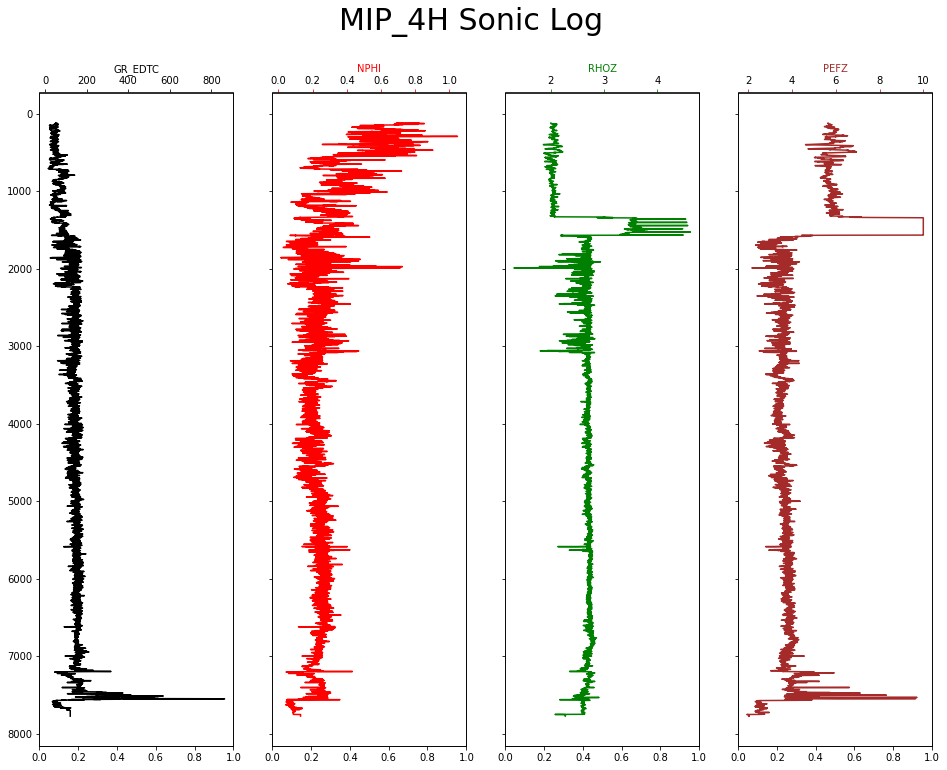

In [35]:
fig,ax= plt.subplots(nrows=1, ncols=4,figsize=(16,12),sharey=True)
fig.suptitle("MIP_4H Sonic Log", fontsize=30)

Name='MIP_4H'

# Track #1:
User1=df_log[df_log['Well_Name']==Name]['GR_EDTC'] 
User2=df_log[df_log['Well_Name']==Name]['DEPT'] 
ax1=ax[0].twiny()
ax1.invert_yaxis()
ax1.plot(User1,User2, color='black',linestyle='-')
ax1.set_xlabel('GR_EDTC',color='black')
ax1.tick_params(axis='x', color='black')
ax1.spines['top'].set_position(('outward',1))

# Track #2:
User3=df_log[df_log['Well_Name']==Name]['NPHI'] 
User4=df_log[df_log['Well_Name']==Name]['DEPT'] 
ax2=ax[1].twiny()
ax2.invert_yaxis()
ax2.plot(User3,User4, color='red',linestyle='-')
ax2.set_xlabel('NPHI',color='red')
ax2.tick_params(axis='x', color='red')
ax2.spines['top'].set_position(('outward',1))

# Track #3:
User5=df_log[df_log['Well_Name']==Name]['RHOZ'] 
User6=df_log[df_log['Well_Name']==Name]['DEPT'] 
ax3=ax[2].twiny()
ax3.invert_yaxis()
ax3.plot(User5,User6, color='green',linestyle='-')
ax3.set_xlabel('RHOZ',color='green')
ax3.tick_params(axis='x', color='green')
ax3.spines['top'].set_position(('outward',1))

# Track #4:
User7=df_log[df_log['Well_Name']==Name]['PEFZ'] 
User8=df_log[df_log['Well_Name']==Name]['DEPT'] 
ax4=ax[3].twiny()
ax4.invert_yaxis()
ax4.plot(User7,User8, color='brown',linestyle='-')
ax4.set_xlabel('PEFZ',color='brown')
ax4.tick_params(axis='x', color='brown')
ax4.spines['top'].set_position(('outward',1))

plt.gca().invert_yaxis()

<span id = "rap"><h3>Using bokeh for well log plotting</h3></span>

In [36]:
import bokeh as bk

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.layouts import column, row
from bokeh.models import Range1d, HoverTool, LinearAxis, Legend

In [37]:
maxdepth = float(min(df_log['DEPT']))
mindepth = float(max(df_log['DEPT']))

In [38]:
output_file("taylor.html")
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"
hover = HoverTool()


t1 = bk.plotting.figure(title='GR_EDTC',
            plot_width=250, plot_height=750,
            y_range=(mindepth, maxdepth), 
            x_axis_location='above',tools=TOOLS
            )

t1.line(x=df_log['GR_EDTC'], y=df_log['DEPT'], color='black')


t2 = bk.plotting.figure(title='NPHI, RHOZ',
            plot_width=250, plot_height=750,
            y_range=(mindepth, maxdepth), 
            x_axis_location='above',tools=TOOLS
            )

t2.axis.axis_label_standoff=100
t2.line(x='NPHI', y='DEPT', source=df_log,color='red')
t2.line(x='RHOZ', y='DEPT', source=df_log, color='blue')

t3 = bk.plotting.figure(title='PEFZ', 
            plot_width=250, plot_height=750,
            y_range=(mindepth, maxdepth), 
            x_axis_location='above',tools=TOOLS)
t3.line(df_log['PEFZ'], df_log['DEPT'], color='orange')

TOOLTIPS1 = HoverTool(tooltips =[
        ( 'depth',  '$y'   ),
        ( 'GR_EDTC',   '$x'     )
], 
        mode = 'hline')

TOOLTIPS2 = HoverTool(tooltips =[
        ( 'depth',  '$y'   ),
        ( 'NPHI',   '@NPHI'   ),
        ('RHOZ','@RHOZ')
], 
        mode = 'hline')

TOOLTIPS3 = HoverTool(tooltips =[
        ( 'depth',  '$y'   ),
        ( 'PEFZ',   '$x'   ), # use @{ } for field names with spaces
], 
        mode = 'hline')
t1.tools.append(TOOLTIPS1)
t2.tools.append(TOOLTIPS2)
t3.tools.append(TOOLTIPS3)


show(row(t1,t2,t3))